In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

import matplotlib
matplotlib.rcParams['figure.dpi'] = 100
f_path = "/System/Library/Fonts/Helvetica.ttc"
font_name = fm.FontProperties(fname=f_path).get_name()
rc('font', family=font_name, size=13)

## Annotaion result

In [50]:
df_annot = pd.read_excel('../dataset/03_belief_filtering_GPT4_result_essential_data/Belief_Annotation_Result.xlsx')

In [51]:
df_annot.head()

,debate_title,Annotator_1,Annotator_2,Annotator_3,GPT-4,Majority,Matched
0,"In the United States, Minor Jail Time Ought to...",1,1,1,1,1,1
1,should gay marriage be legal?,1,1,1,0,1,0
2,Stand your ground.,0,0,0,0,0,1
3,Prove that the god according to the bible love...,0,0,0,0,0,1
4,Do or Do Not there is no try. Do you Agree?,1,1,0,1,1,1


In [52]:
from statsmodels.stats import inter_rater
from statsmodels.stats.inter_rater import fleiss_kappa

In [53]:
rater_result = inter_rater.aggregate_raters(df_annot.iloc[:, 1:4], n_cat=2)

In [54]:
kappa_score = fleiss_kappa(rater_result[0], method='fleiss')
print(f"Fleiss' Kappa: {kappa_score}")

Fleiss' Kappa: 0.8666429587482222


## Consistency with gpt-4

In [55]:
data = df_annot

In [56]:
data.head()

,debate_title,Annotator_1,Annotator_2,Annotator_3,GPT-4,Majority,Matched
0,"In the United States, Minor Jail Time Ought to...",1,1,1,1,1,1
1,should gay marriage be legal?,1,1,1,0,1,0
2,Stand your ground.,0,0,0,0,0,1
3,Prove that the god according to the bible love...,0,0,0,0,0,1
4,Do or Do Not there is no try. Do you Agree?,1,1,0,1,1,1


In [75]:
def get_color_from_palette(ratio, cmap_name='viridis'):
    cmap = plt.get_cmap(cmap_name)
    color = cmap(ratio)  # Get RGBA color
    return matplotlib.colors.rgb2hex(color)

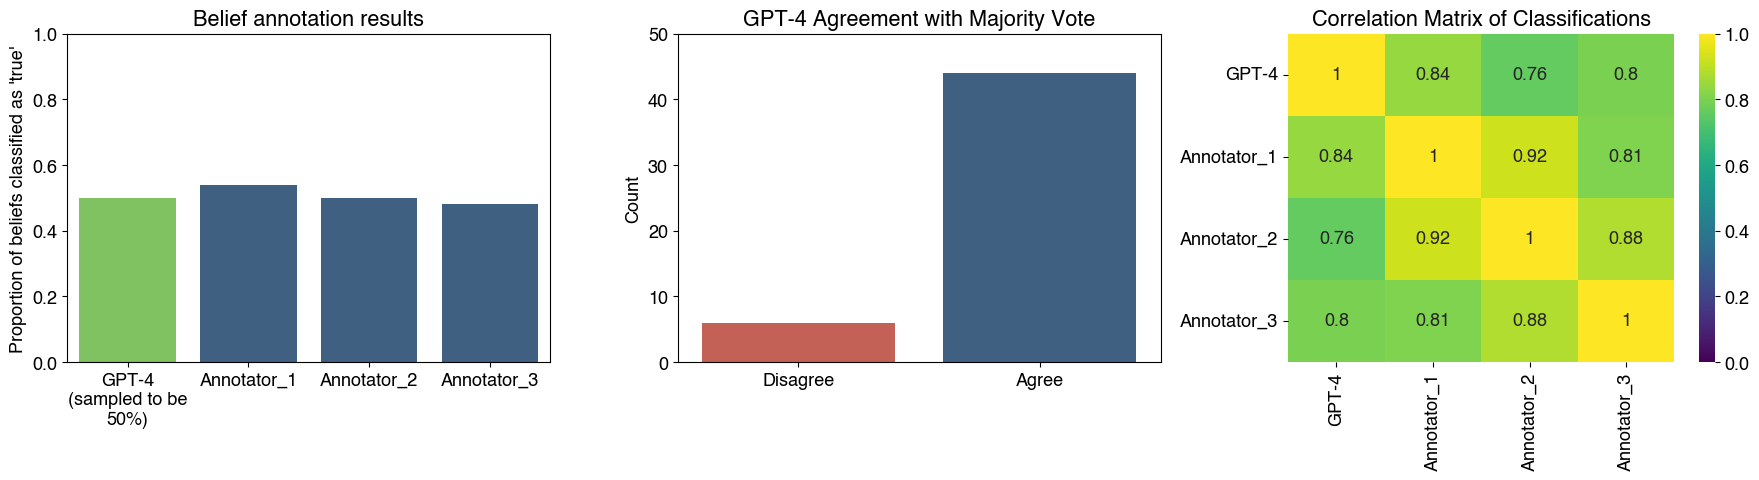

In [110]:
# Create a figure to hold multiple plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Bar plot of mean values for annotators and GPT-4
mean_values = data[['GPT-4', 'Annotator_1', 'Annotator_2', 'Annotator_3']].mean()

colors = [get_color_from_palette(0.8)]
for i in range(3):
    colors.append(get_color_from_palette(0.3))

sns.barplot(x=mean_values.index, y=mean_values.values, palette=colors, ax=axes[0])
axes[0].set_xticklabels(['GPT-4\n(sampled to be\n50%)', 'Annotator_1', 'Annotator_2', 'Annotator_3'])
axes[0].set_title('Belief annotation results')
axes[0].set_ylabel("Proportion of beliefs classified as 'true'")
axes[0].set_ylim(0, 1)

# Plot 2: Agreement rate of GPT-4 with majority vote
agreement_counts = data['Matched'].value_counts()
sns.barplot(x=agreement_counts.index, y=agreement_counts.values, palette=[get_color_from_palette(0.9,'coolwarm'), get_color_from_palette(0.3,'viridis') ], ax=axes[1])
axes[1].set_title('GPT-4 Agreement with Majority Vote')
axes[1].set_xticklabels(['Disagree', 'Agree'])
axes[1].set_ylabel('Count')
axes[1].set_ylim(0, data.shape[0])

# Plot 3: Heatmap of agreement between individual annotators and GPT-4
comparison_matrix = data[['GPT-4', 'Annotator_1', 'Annotator_2', 'Annotator_3']].corr()
sns.heatmap(comparison_matrix, annot=True, cmap="viridis", ax=axes[2], vmin=0)
axes[2].set_title('Correlation Matrix of Classifications')

# Display the plots
plt.tight_layout()
plt.savefig('../fig/SI/Annotation_task_result.pdf', transparent=True, bbox_inches='tight')
plt.show()